# Data pretrain

In [4]:
!mkdir pt_data
!mkdir pt_data/images
!mkdir pt_data/json

In [7]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 54.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 35.7 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
   

In [8]:
import json
from datasets import load_dataset
data = load_dataset("5CD-AI/Vietnamese-liuhaotian-LLaVA-Pretrain-gg-translated")

Generating train split:   0%|          | 0/558128 [00:00<?, ? examples/s]

In [9]:
# import glob
# coco_images = glob.glob("pt_data/images/*/*.jpg")
# coco_images = [path_.split("/")[-1] for path_ in coco_images]
# coco_images = set(coco_images)
# len(coco_images)

In [10]:
json_data = []

In [11]:
for i, row in enumerate(data["train"]):
    json_data.append({
      "id": row["id"],
      "image": row["image"],
      "conversations": row["conversations_vi"]
    })
    # if i >= 10000:
    #     break

IOStream.flush timed out
IOStream.flush timed out


In [12]:
json_data[0]

{'id': '003060223',
 'image': '00306/003060223.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nTrình bày mô tả ngắn gọn về các đặc điểm chính của ảnh.'},
  {'from': 'gpt', 'value': 'gót ren lồng'}]}

In [13]:
# import json
# with open('/MoE-LLaVA/pt_data/json/pt_moe_llava.json', 'w', encoding='utf-8') as f:
#     json.dump(json_data, f, ensure_ascii=False, indent=4)

In [14]:
import json

In [17]:
with open("laion/500k_vilaion_pretrain.json") as f:
    laion = json.load(f)

In [18]:
import json
with open('/MoE-LLaVA/pt.json', 'w', encoding='utf-8') as f:
    json.dump(laion+json_data, f, ensure_ascii=False, indent=4)

In [3]:
!ls vista/vi_wit

In [1]:
import glob, shutil

for i in glob.glob('laion/laion_pretrain/*.jpg'):
  shutil.move(i, 'LLaVA-Pretrain/' + i.split("/")[-1])

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained(
    "sail/Sailor-1.8B",
    torch_dtype="auto",
)
tokenizer = AutoTokenizer.from_pretrained("sail/Sailor-1.8B")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
[2024-06-14 06:43:21,089] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/3.67G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/118 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
model.save_pretrained("Qwen1.5-1.8B-sailor")

In [4]:
tokenizer.save_pretrained("Qwen1.5-1.8B-sailor")

('Qwen1.5-1.8B-sailor/tokenizer_config.json',
 'Qwen1.5-1.8B-sailor/special_tokens_map.json',
 'Qwen1.5-1.8B-sailor/vocab.json',
 'Qwen1.5-1.8B-sailor/merges.txt',
 'Qwen1.5-1.8B-sailor/added_tokens.json',
 'Qwen1.5-1.8B-sailor/tokenizer.json')

In [1]:
import json

In [2]:
from datasets import load_dataset

In [3]:
data = load_dataset("5CD-AI/Vietnamese-liuhaotian-LLaVA-Pretrain-gg-translated")

In [9]:
import glob
coco_images = glob.glob("pt_data/images/*/*.jpg")
coco_images = [path_.split("/")[-1] for path_ in coco_images]
coco_images = set(coco_images)
len(coco_images)

558128

In [11]:
json_data = []

In [12]:
for row in data["train"]:
    json_data.append({
      "id": row["id"],
      "image": row["image"],
      "conversations": row["conversations_vi"]
    })
    json_data.append({
      "id": row["id"]+"_",
      "image": row["image"],
      "conversations": row["conversations_zh"]
    })

In [13]:
len(json_data)

1116256

In [14]:
json_data[20]

{'id': '002733327',
 'image': '00273/002733327.jpg',
 'conversations': [{'from': 'human',
   'value': 'Mô tả hình ảnh một cách ngắn gọn.\n<image>'},
  {'from': 'gpt', 'value': 'bộ ba chốt con cú'}]}

In [15]:
import json
with open('/home/administrator/aiteam/khang/MoE-LLaVA/pt_data/json/pt_moe_llava.json', 'w', encoding='utf-8') as f:
    json.dump(json_data, f, ensure_ascii=False, indent=4)

# Data finetune

In [3]:
from datasets import load_dataset

In [4]:
vi_llava_conversation = load_dataset("Vi-VLM/Vista", name="vi_llava_conversation", split="train")
vi_sharegpt4v = load_dataset("Vi-VLM/Vista", name="vi_sharegpt4v", split="train")
vi_llava_complex_reasoning = load_dataset("Vi-VLM/Vista", name="vi_llava_complex_reasoning", split="train")
vi_llava_detail_description = load_dataset("Vi-VLM/Vista", name="vi_llava_detail_description", split="train")

In [5]:
vi_llava_conversation = vi_llava_conversation.to_list()
vi_sharegpt4v = vi_sharegpt4v.to_list()
vi_llava_complex_reasoning = vi_llava_complex_reasoning.to_list()
vi_llava_detail_description = vi_llava_detail_description.to_list()

In [9]:
import glob
coco_images = glob.glob("ft_data/images/*.jpg")
coco_images = [path_.split("/")[-1] for path_ in coco_images]
coco_images = set(coco_images)
len(coco_images)

15090

In [12]:
json_data = []
count = 0

In [13]:
for row in vi_sharegpt4v:
    if row["image"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["vi_conversations"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["value"]
            })
        json_data.append({
          "id": count,
          "image": row["image"].split("/")[-1],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

28947

In [16]:
json_data[0]

{'id': 0,
 'image': '000114241.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nBạn có thể giải thích thêm về các yếu tố của bức ảnh được cung cấp không?'},
  {'from': 'gpt',
   'value': 'Hình ảnh có một logo ấn tượng cho một công ty có tên "Machine No Guns". Logo được đặt trên một hình vuông màu đen, tạo nên sự tương phản mạnh mẽ thu hút sự chú ý vào các yếu tố bên trong. Chiếm giữ trung tâm của logo là tên công ty, "Machine No Guns", được viết bằng phông chữ không chân, in đậm. Văn bản chủ yếu có màu trắng, nhưng chữ "M" trong "Machine" và chữ "G" trong "Guns" được tô sáng bằng màu cam rực rỡ.\n\nChữ "M" được thay thế sáng tạo bằng hình minh họa màu cam của một khẩu súng máy, thể hiện tên công ty theo cách hấp dẫn về mặt hình ảnh. Trên khẩu súng máy này, có một biểu tượng "không" màu đỏ, nhấn mạnh thêm phần "No Guns" trong tên công ty.\n\nBên dưới văn bản chính, bằng phông chữ màu trắng nhỏ hơn và tinh tế hơn, dòng chữ "Garments and Goods" được ghi, cho biết loại sản 

In [15]:
import glob
coco_images = glob.glob("ft_data/images/train2017/*.jpg")
coco_images = [path_.split("/")[-1] for path_ in coco_images]
coco_images = set(coco_images)
len(coco_images)

118287

In [17]:
for row in vi_llava_conversation:
    if row["file_name"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["conversation"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["content"]
            })
        json_data.append({
          "id": count,
          "image": "train2017/"+row["file_name"],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

135999

In [18]:
json_data[-1]

{'id': 135998,
 'image': 'train2017/000000242558.jpg',
 'conversations': [{'from': 'human',
   'value': 'Biển báo đường bằng gỗ bên cạnh biển báo lớn hơn có nội dung gì?'},
  {'from': 'gpt', 'value': 'Biển báo đường bằng gỗ có nội dung "Crook ST."'},
  {'from': 'human',
   'value': 'Biển báo lớn hơn bên cạnh biển báo đường bằng gỗ hiển thị hình ảnh gì?'},
  {'from': 'gpt',
   'value': 'Biển báo lớn hơn bên cạnh biển báo đường bằng gỗ hiển thị hình ảnh của một người đàn ông cơ bắp.'},
  {'from': 'human',
   'value': 'Hai biển báo được liên kết với nhau bằng cách nào?'},
  {'from': 'gpt',
   'value': 'Hai biển báo được liên kết với nhau bằng một sợi xích.'},
  {'from': 'human', 'value': 'Trên biển báo lớn hơn có chữ viết nào không?'},
  {'from': 'gpt', 'value': 'Trên biển báo lớn hơn không có chữ viết nào.'},
  {'from': 'human', 'value': 'Hai dấu hiệu được đặt trên bề mặt nào?'},
  {'from': 'gpt', 'value': 'Hai dấu hiệu được đặt trên cỏ.'},
  {'from': 'human',
   'value': 'Bạn có thể suy

In [19]:
for row in vi_llava_complex_reasoning:
    if row["file_name"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["conversation"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["content"]
            })
        json_data.append({
          "id": count,
          "image": "train2017/"+row["file_name"],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

248649

In [20]:
for row in vi_llava_detail_description:
    if row["file_name"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["conversation"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["content"]
            })
        json_data.append({
          "id": count,
          "image": "train2017/"+row["file_name"],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

359802

In [21]:
json_data_cleaned = []

In [22]:
for row in json_data:
    if len(row["conversations"]) >= 2:
        json_data_cleaned.append(row)

In [23]:
len(json_data_cleaned)

359662

In [24]:
import json
with open('/home/administrator/aiteam/khang/MoE-LLaVA/ft_data/json/ft_moe_llava.json', 'w', encoding='utf-8') as f:
    json.dump(json_data_cleaned, f, ensure_ascii=False, indent=4)

# Test

In [4]:
!nvidia-smi

Fri Jun 14 14:04:27 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:02:00.0 Off |                  N/A |
|  0%   34C    P8    20W / 420W |     37MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:03:00.0 Off |                  N/A |
|  0%   

In [2]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
import torch
from PIL import Image
from moellava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN
from moellava.conversation import conv_templates, SeparatorStyle
from moellava.model.builder import load_pretrained_model
from moellava.utils import disable_torch_init
from moellava.mm_utils import tokenizer_image_token, get_model_name_from_path, KeywordsStoppingCriteria

[2024-06-15 06:47:43,315] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [4]:
disable_torch_init()

In [8]:
!ls ./checkpoints/llavaqwen-1.5-1.8b-finetune-new-lora-665k/checkpoint-30

README.md		   latest		    tokenizer_config.json
adapter_config.json	   merges.txt		    trainer_state.json
adapter_model.bin	   non_lora_trainables.bin  training_args.bin
adapter_model.safetensors  rng_state_0.pth	    vocab.json
added_tokens.json	   rng_state_1.pth	    zero_to_fp32.py
config.json		   scheduler.pt
global_step30		   special_tokens_map.json


In [9]:
model_path = './checkpoints/llavaqwen-1.5-1.8b-finetune-new-lora-665k/checkpoint-30'  # LanguageBind/MoE-LLaVA-Qwen-1.8B-4e or LanguageBind/MoE-LLaVA-StableLM-1.6B-4e
device = 'cuda'
load_4bit, load_8bit = False, False  # FIXME: Deepspeed support 4bit or 8bit?
model_name = get_model_name_from_path(model_path)
tokenizer, model, processor, context_len = load_pretrained_model(model_path, "./Qwen1.5-1.8B-sailor", model_name, load_8bit, load_4bit, device=device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading LLaVA from base model...


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of LlavaQwen1_5ForCausalLM were not initialized from the model checkpoint at ./Qwen1.5-1.8B-sailor and are newly initialized: ['model.mm_projector.image_spatial_proj.0.bias', 'model.mm_projector.image_spatial_proj.0.weight', 'model.mm_projector.image_spatial_proj.2.bias', 'model.mm_projector.image_spatial_proj.2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loading additional LLaVA weights...
Loading LoRA weights...
Merging LoRA weights...
Model is loaded...
LlavaQwen1_5Config {
  "_name_or_path": "./Qwen1.5-1.8B-sailor",
  "architectures": [
    "Qwen2ForCausalLM"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 151643,
  "eos_token_id": 151643,
  "freeze_mm_mlp_adapter": false,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "image_aspect_ratio": "pad",
  "image_projector_type": "mlp2x_gelu",
  "initializer_range": 0.02,
  "intermediate_size": 5504,
  "max_position_embeddings": 8192,
  "max_window_layers": 21,
  "mm_hidden_size": 1024,
  "mm_image_tower": "openai/clip-vit-large-patch14-336",
  "mm_projector_lr": null,
  "mm_use_im_patch_token": false,
  "mm_use_im_start_end": false,
  "mm_video_tower": null,
  "mm_vision_select_feature": "patch",
  "mm_vision_select_layer": -2,
  "model_type": "llava_qwen1_5",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "num_key_value_heads": 16,
  "pad_token_id": 151646,
  "rms_norm_ep

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [10]:
import glob
import matplotlib.pyplot as plt

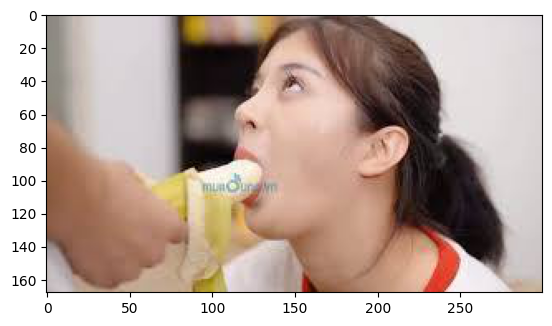

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bạn có thể mô tả bức tranh này không?
Bài viết này được đăng bởi: 12345678900000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


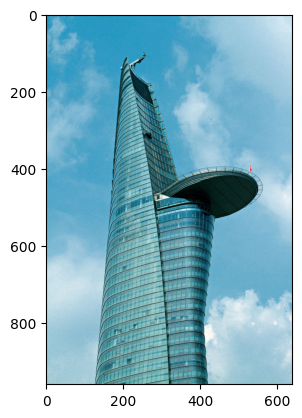

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bạn có thể mô tả bức tranh này không?
Công ty TNHH CNTT và Truyền thông Đài Loan
Công ty TNHH CNTT và Truyền thông Đài Loan, trụ sở chính tại Đài Bắc, Đài Loan
Công ty TNHH CNTT và Truyền thông Đài Loan, trụ sở chính tại Đài Bắc, Đài Loan, Đài Bắc, Đài Loan
Công ty TNHH CNTT và Truyền thông Đài Loan, trụ sở chính tại Đài Bắc, Đài Loan, Đài Bắc, Đài Loan, Đài Bắc, Đài Loan
Công ty TNHH CNTT và Truyền thông Đài Loan, trụ sở chính tại Đài Bắc, Đài Loan, Đài Bắc, Đài Loan, Đài Bắc, Đài Loan
Công ty TNHH CNTT và Truyền thông Đài Loan, trụ sở chính tại Đài Bắc, Đài Loan, Đài Bắc, Đài Loan, Đài Bắc, Đài Loan
Công ty TNHH CNTT và Truyền thông Đài Loan, trụ sở chính tại Đài Bắc, Đài Loan, Đài Bắc, Đài Loan, Đài Bắc,


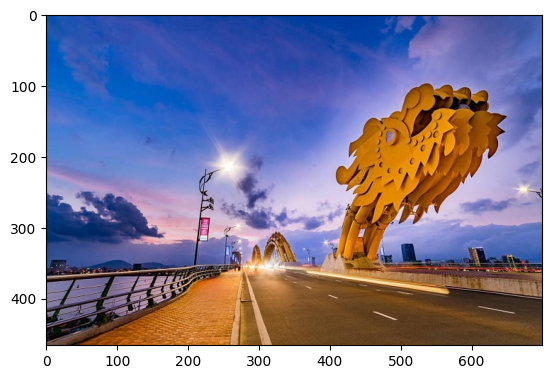

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?
Bạn có thể mô tả bức tranh này không?
Bức tranh này được vẽ vào ban đêm, khi mặt trời đã lặn và ánh sáng mặt trời đã tắt
Bức tranh này được vẽ vào ban đêm, khi mặt trời đã lặn và ánh sáng mặt trời đã tắt
Bức tranh này được vẽ vào ban đêm, khi mặt trời đã lặn và ánh sáng mặt trời đã tắt
Bức tranh này được vẽ vào ban đêm, khi mặt trời đã lặn và ánh sáng mặt trời đã tắt
Bức tranh này được vẽ vào ban đêm, khi mặt trời đã lặn và ánh sáng mặt trời đã tắt
Bức tranh này được vẽ vào ban đêm, khi mặt trời đã lặn và ánh sáng mặt trời đã tắt
Bức tranh này được vẽ vào ban đêm, khi mặt trời đã lặn và ánh sáng mặt trời đã tắt
Bức tranh này được vẽ vào ban đêm, khi mặt trời đã lặn và ánh sáng mặt trời đã tắt
Bức tranh này được vẽ vào ban đêm, khi mặt trời đã lặn và ánh sáng mặt trời đã tắt
Bức


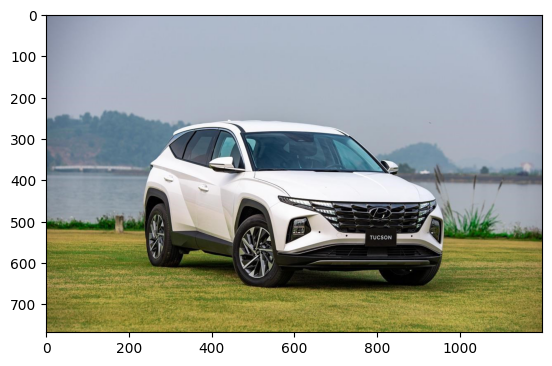

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


USER: Bạn có thể mô tả bức tranh này không?


In [ ]:
for image_path in glob.glob("test_images/*"):
    inp = 'Bạn có thể mô tả bức tranh này không?'
    image = image_path
    image_processor = processor['image']
    conv_mode = "qwen"  # qwen or stablelm
    conv = conv_templates[conv_mode].copy()
    roles = conv.roles
    image_tensor = image_processor.preprocess(Image.open(image).convert('RGB'), return_tensors='pt')['pixel_values'].to(model.device, dtype=torch.float16)
    plt.imshow(Image.open(image).convert('RGB'))
    plt.show()
    print(f"{roles[0]}: {inp}")
    # inp = DEFAULT_IMAGE_TOKEN + '\n' + inp
    inp = inp + "\n" + DEFAULT_IMAGE_TOKEN 
    conv.append_message(conv.roles[0], inp)
    conv.append_message(conv.roles[1], None)
    prompt = conv.get_prompt()
    input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).cuda()
    stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
    keywords = [stop_str]
    stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
    with torch.inference_mode():
        output_ids = model.generate(
        input_ids,
        images=image_tensor,
        do_sample=True,
        temperature=0.2,
        max_new_tokens=256,
        num_beams=1,
        use_cache=True,
        stopping_criteria=[stopping_criteria])

    outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:], skip_special_tokens=True).strip()
    print(outputs)
    print("="*100)

In [11]:
import deepspeed
deepspeed.__version__

'0.9.5'

In [14]:
from deepspeed.accelerator import get_accelerator

In [15]:
get_accelerator().communication_backend_name()

'nccl'